In [ ]:
"""
Hansard Turnwise Attention Analysis
===================================
Reads files created by turn_frequency.py and creates plots to show patterns/trends in turn frequency / turn counts.
"""

## 1. Setup

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from pathlib import Path

sns.set(style="whitegrid", context="talk")
plt.rcParams["figure.figsize"] = (10, 6)

## 2. Load Data

In [65]:
in_path1 = Path("/Users/msawkar/Projects/hansard-nlp-explorer/src/hansard/data/analysis_data/attention_turn_freq_ind.parquet")
in_path2 = Path("/Users/msawkar/Projects/hansard-nlp-explorer/src/hansard/data/analysis_data/attention_turn_freq_group.parquet")

speaker_norm = pd.read_parquet(in_path1)
group_norm = pd.read_parquet(in_path2)
display(speaker_norm.head())
display(group_norm.head())

,debate_id,speaker,gender,turns,expected_turns_gender,norm_turns,year,decade,month,reference_date,chamber,title,topic,flat_norm_turns,expected_turns_flat
0,0000306c599d8b97,COMMANDER GALBRAITH,M,1,2.0,0.500000,1944,1940,jan,18 January 1944,Commons,Pensioned Civil Servants (Re-employment) (Hans...,Pensioned Civil Servants (Re-employment),1.000000,1.0
1,0000306c599d8b97,MR. ASSHETON,M,1,2.0,0.500000,1944,1940,jan,18 January 1944,Commons,Pensioned Civil Servants (Re-employment) (Hans...,Pensioned Civil Servants (Re-employment),1.000000,1.0
2,00004c52312f0124,MR. BARON,M,1,6.0,0.166667,2002,2000,nov,26 November 2002,Commons,"Scottish Parliament (Hansard, 26 November 2002)",Scottish Parliament,0.666667,1.5
3,00004c52312f0124,MR. ERNIE ROSS,M,1,6.0,0.166667,2002,2000,nov,26 November 2002,Commons,"Scottish Parliament (Hansard, 26 November 2002)",Scottish Parliament,0.666667,1.5
4,00004c52312f0124,MR. PETER DUNCAN,M,1,6.0,0.166667,2002,2000,nov,26 November 2002,Commons,"Scottish Parliament (Hansard, 26 November 2002)",Scottish Parliament,0.666667,1.5


,debate_id,gender,observed_turns,expected_turns,group_norm_turns,year,decade,chamber
0,0000306c599d8b97,M,2,2.0,1.000000,1944,1940,Commons
1,00004c52312f0124,F,5,3.0,1.666667,2002,2000,Commons
2,00004c52312f0124,M,4,6.0,0.666667,2002,2000,Commons
3,000077a16d4c41ba,M,6,6.0,1.000000,1962,1960,Commons
4,0000afc1487a076a,M,3,3.0,1.000000,1962,1960,Commons


## 3. Basic Checks

In [66]:
print(speaker_norm.shape)
print(speaker_norm["gender"].value_counts())

(1143309, 15)
gender
M    1110287
F      33022
Name: count, dtype: int64


# 1. Per-debate, Per-gender, Per-speaker  Normalized Turns

## 1.1. Distribution of Normalized Turns

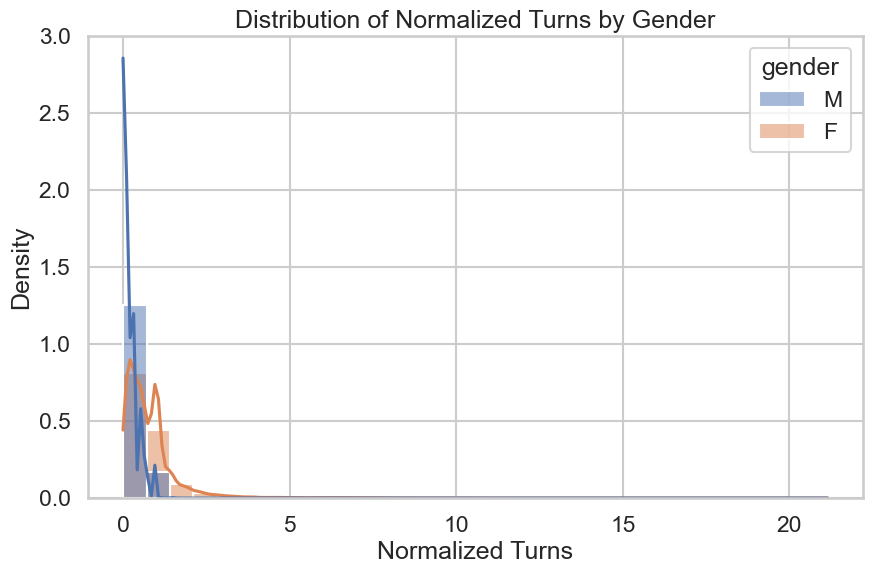

In [67]:
sns.histplot(speaker_norm, x="norm_turns", hue="gender", bins=30, kde=True, stat="density", common_norm=False)
plt.title("Distribution of Normalized Turns by Gender")
plt.xlabel("Normalized Turns")
plt.ylabel("Density")
plt.show()

## 1.2. Average Normalized Turns by Gender

/var/folders/0m/grfzmmms0559g5xz0whbn8180000gn/T/ipykernel_34896/991546588.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_by_gender, x="gender", y="norm_turns", palette="pastel")


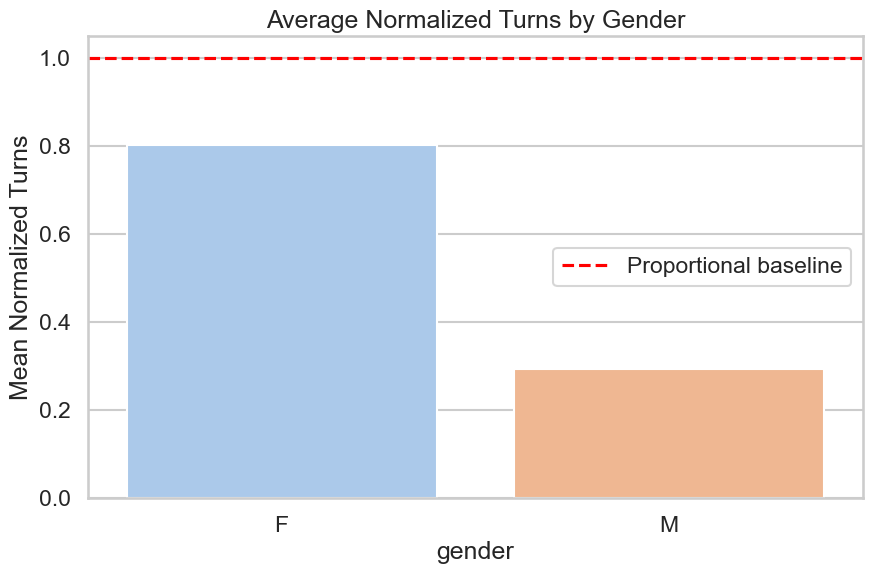

In [68]:
avg_by_gender = speaker_norm.groupby("gender")["norm_turns"].mean().reset_index()
sns.barplot(data=avg_by_gender, x="gender", y="norm_turns", palette="pastel")
plt.title("Average Normalized Turns by Gender")
plt.ylabel("Mean Normalized Turns")
plt.axhline(1, color="red", linestyle="--", label="Proportional baseline")
plt.legend()
plt.show()

## 1.3. Temporal Trends (by Decade)

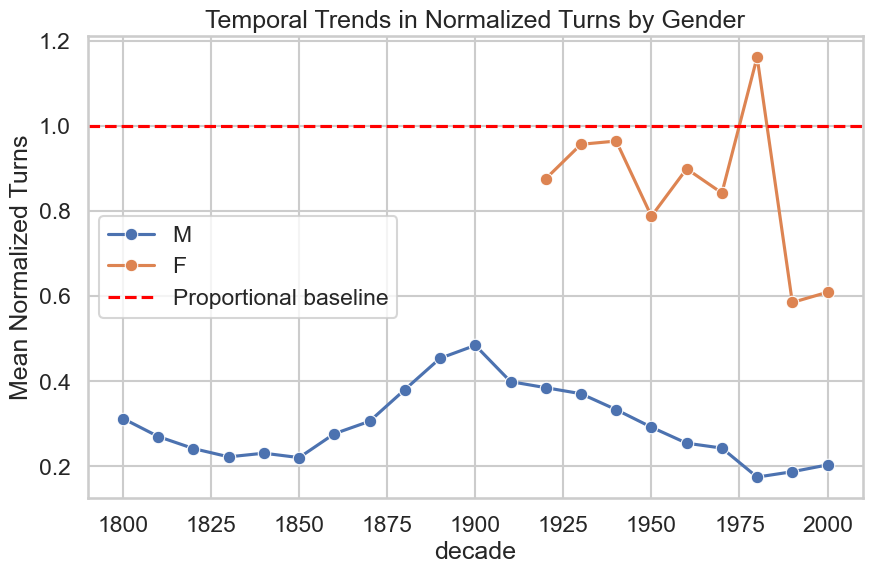

In [69]:
decade_gender = speaker_norm.groupby(["decade","gender"])["norm_turns"].mean().reset_index()
sns.lineplot(data=decade_gender, x="decade", y="norm_turns", hue="gender", marker="o")
plt.title("Temporal Trends in Normalized Turns by Gender")
plt.axhline(1, color="red", linestyle="--", label="Proportional baseline")
plt.ylabel("Mean Normalized Turns")
plt.legend()
plt.show()

## 1.4. Chamber Comparison

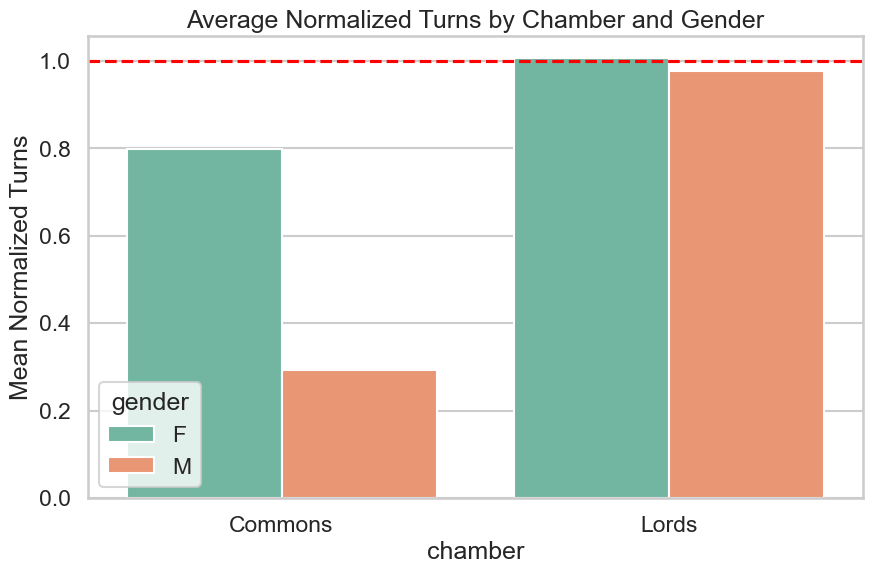

In [70]:
chamber_gender = speaker_norm.groupby(["chamber","gender"])["norm_turns"].mean().reset_index()
sns.barplot(data=chamber_gender, x="chamber", y="norm_turns", hue="gender", palette="Set2")
plt.title("Average Normalized Turns by Chamber and Gender")
plt.axhline(1, color="red", linestyle="--")
plt.ylabel("Mean Normalized Turns")
plt.show()

## 1.5. Debate-level Spread

/var/folders/0m/grfzmmms0559g5xz0whbn8180000gn/T/ipykernel_34896/1977148338.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=debate_gender, x="gender", y="norm_turns", palette="muted")


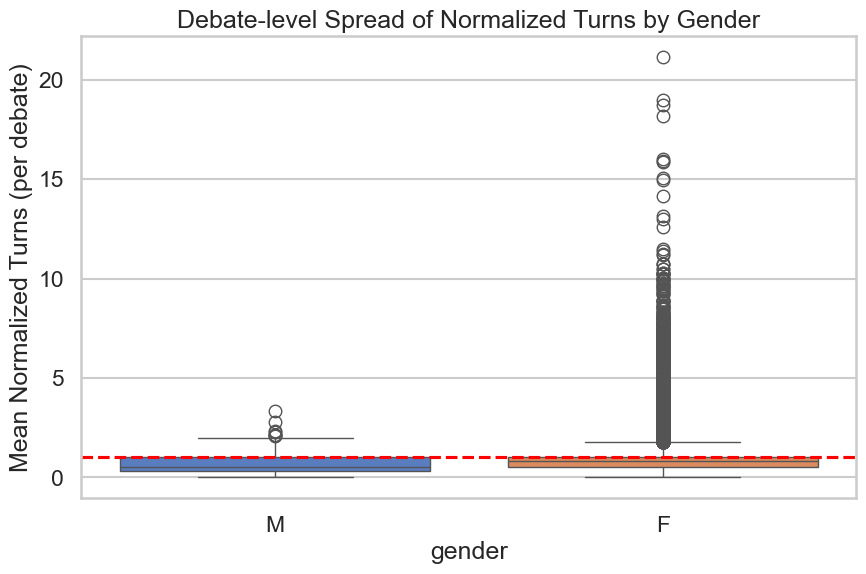

In [71]:
debate_gender = speaker_norm.groupby(["debate_id","gender"])["norm_turns"].mean().reset_index()
sns.boxplot(data=debate_gender, x="gender", y="norm_turns", palette="muted")
plt.title("Debate-level Spread of Normalized Turns by Gender")
plt.axhline(1, color="red", linestyle="--")
plt.ylabel("Mean Normalized Turns (per debate)")
plt.show()

## 2. Per-debate, Per-gender Normalized Turns

### 2.1. Distribution of group-level normalized turns by gender

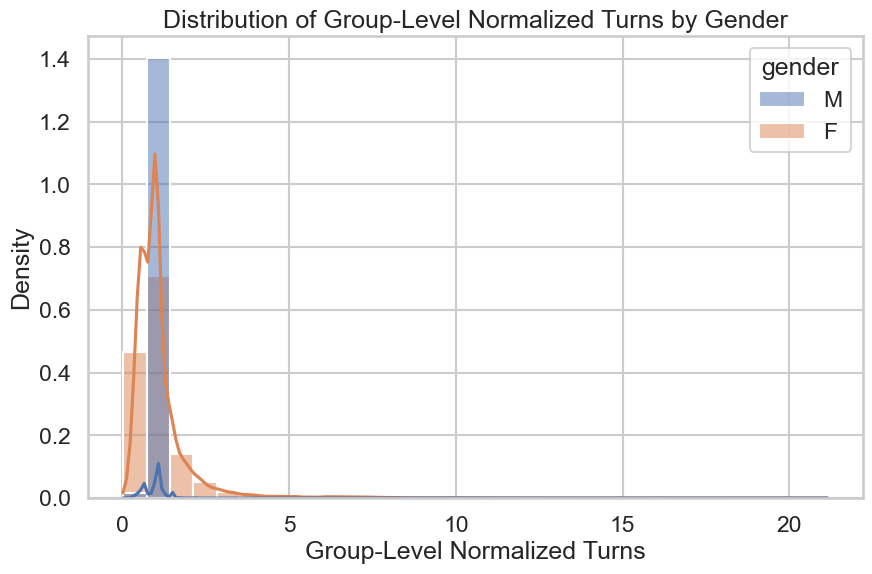

In [72]:
sns.histplot(group_norm, x="group_norm_turns", hue="gender", bins=30, kde=True, stat="density", common_norm=False)
plt.title("Distribution of Group-Level Normalized Turns by Gender")
plt.xlabel("Group-Level Normalized Turns")
plt.ylabel("Density")
plt.show()


### 2.2. Average group-level normalized turns by gender

/var/folders/0m/grfzmmms0559g5xz0whbn8180000gn/T/ipykernel_34896/878884936.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_group, x="gender", y="group_norm_turns", palette="pastel")


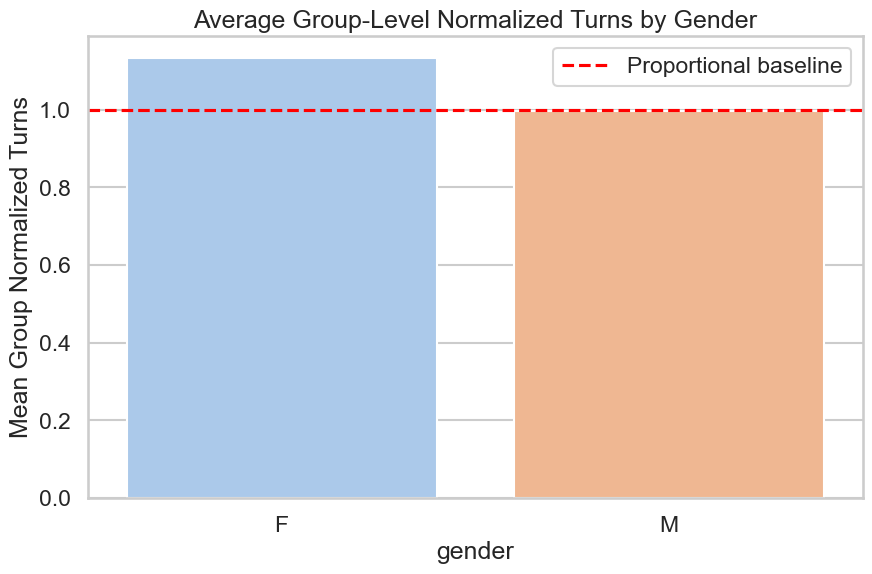

In [73]:
avg_group = group_norm.groupby("gender")["group_norm_turns"].mean().reset_index()
sns.barplot(data=avg_group, x="gender", y="group_norm_turns", palette="pastel")
plt.title("Average Group-Level Normalized Turns by Gender")
plt.ylabel("Mean Group Normalized Turns")
plt.axhline(1, color="red", linestyle="--", label="Proportional baseline")
plt.legend()
plt.show()

### 2.3. Temporal trends (per decade) at group level

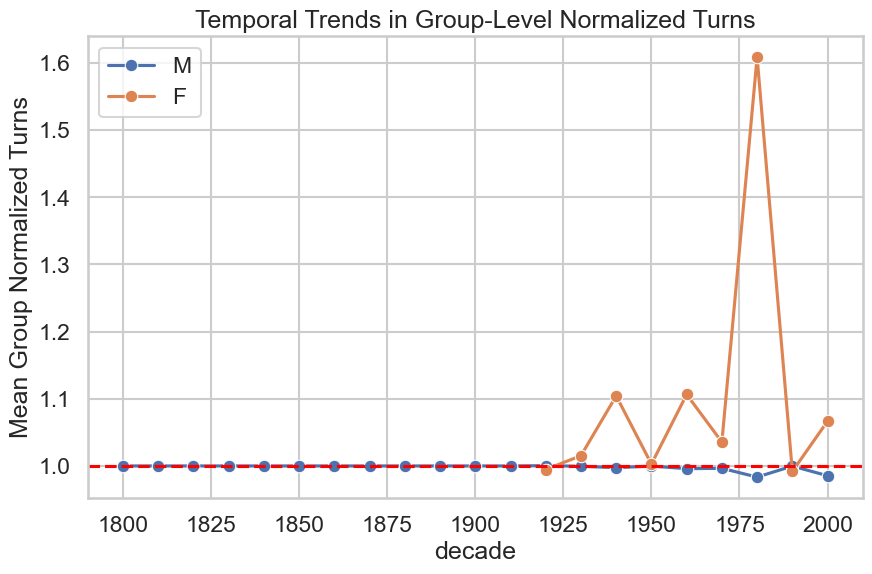

In [74]:
decade_group = group_norm.groupby(["decade","gender"])["group_norm_turns"].mean().reset_index()
sns.lineplot(data=decade_group, x="decade", y="group_norm_turns", hue="gender", marker="o")
plt.title("Temporal Trends in Group-Level Normalized Turns")
plt.axhline(1, color="red", linestyle="--")
plt.ylabel("Mean Group Normalized Turns")
plt.legend()
plt.show()

### 2.4. Chamber comparison at group level

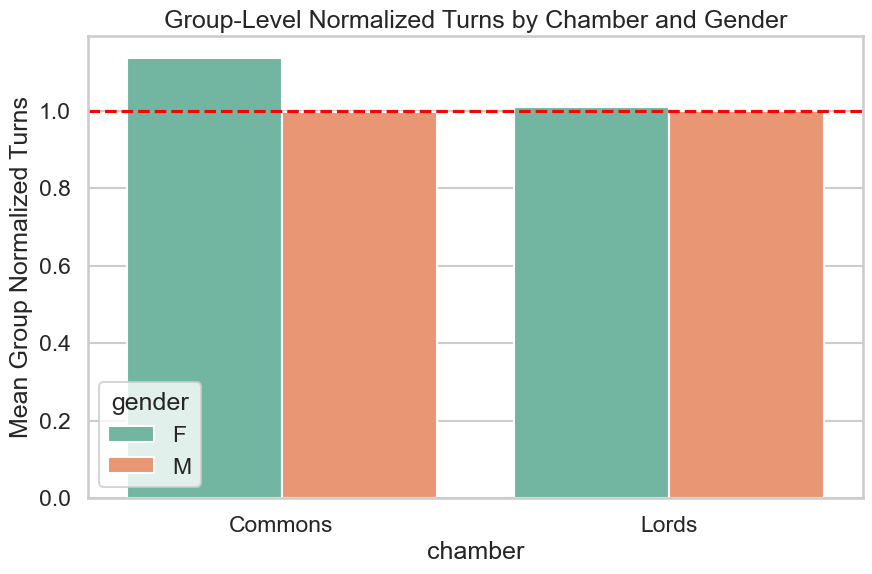

In [75]:
chamber_group = group_norm.groupby(["chamber","gender"])["group_norm_turns"].mean().reset_index()
sns.barplot(data=chamber_group, x="chamber", y="group_norm_turns", hue="gender", palette="Set2")
plt.title("Group-Level Normalized Turns by Chamber and Gender")
plt.axhline(1, color="red", linestyle="--")
plt.ylabel("Mean Group Normalized Turns")
plt.show()

### 2.5. Debate-level spread at group level

/var/folders/0m/grfzmmms0559g5xz0whbn8180000gn/T/ipykernel_34896/2657769261.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=group_norm, x="gender", y="group_norm_turns", palette="muted")


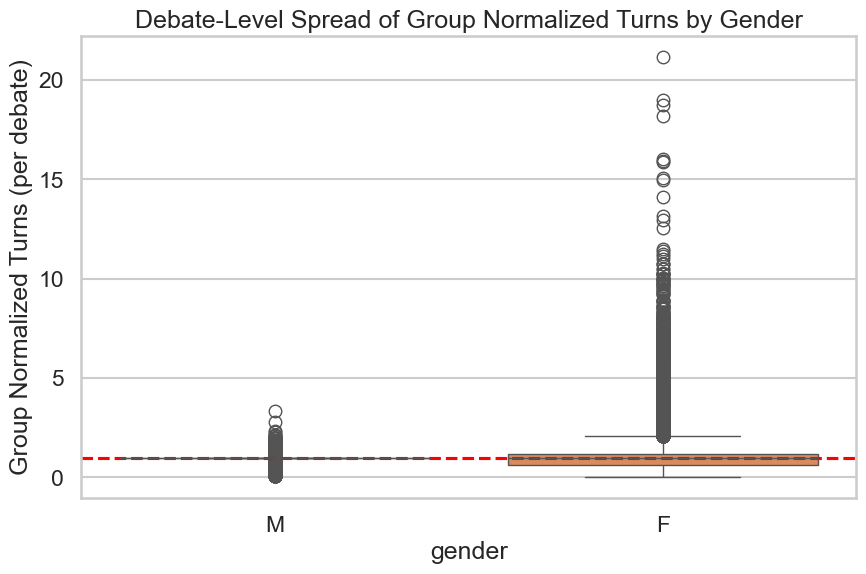

In [76]:
sns.boxplot(data=group_norm, x="gender", y="group_norm_turns", palette="muted")
plt.title("Debate-Level Spread of Group Normalized Turns by Gender")
plt.axhline(1, color="red", linestyle="--")
plt.ylabel("Group Normalized Turns (per debate)")
plt.show()

# 3. Flat Baseline Normalized Turns

## 3.1. Distribution of flat baseline normalized turns

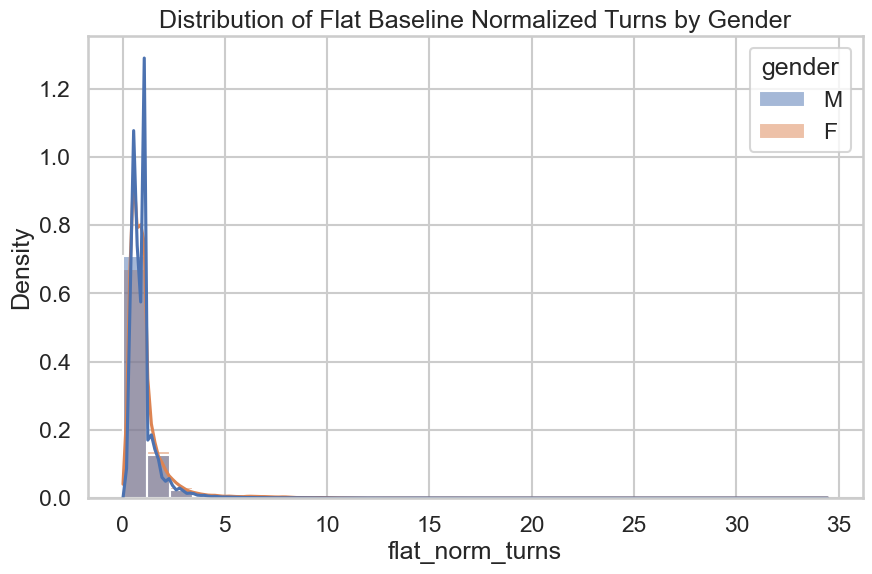

In [77]:
sns.histplot(speaker_norm, x="flat_norm_turns", hue="gender",
             bins=30, kde=True, stat="density", common_norm=False)
plt.title("Distribution of Flat Baseline Normalized Turns by Gender")
plt.show()

## 3.2. Gender averages under flat baseline

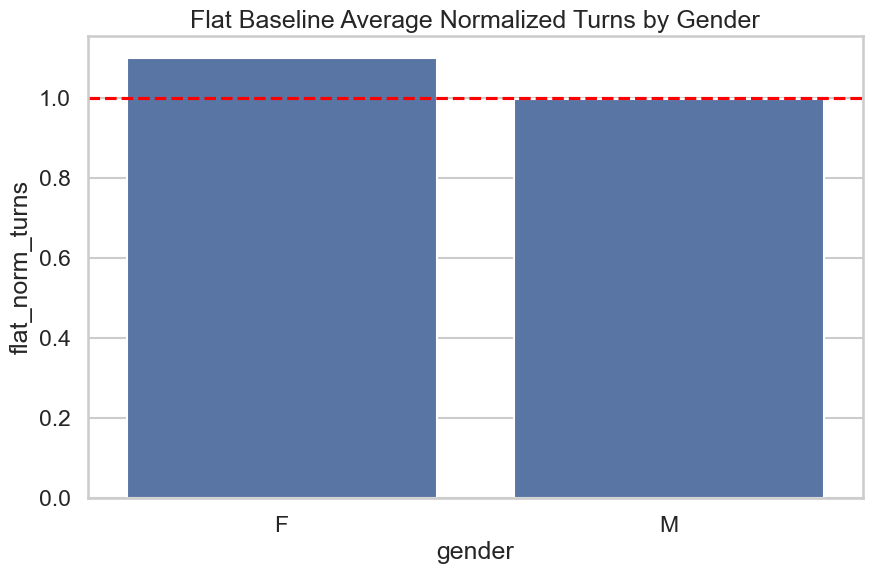

In [78]:
avg_flat = speaker_norm.groupby("gender")["flat_norm_turns"].mean().reset_index()
sns.barplot(data=avg_flat, x="gender", y="flat_norm_turns")
plt.axhline(1, color="red", linestyle="--")
plt.title("Flat Baseline Average Normalized Turns by Gender")
plt.show()

# 4. Statistical Tests

### 4.1. Independent samples t-test (male vs female normalized turns)

In [79]:
male_scores = speaker_norm.loc[speaker_norm["gender"]=="M", "norm_turns"].dropna()
female_scores = speaker_norm.loc[speaker_norm["gender"]=="F", "norm_turns"].dropna()

t_stat, p_val = stats.ttest_ind(male_scores, female_scores, equal_var=False)  # Welch’s t-test
print("Welch's t-test (M vs F): t=%.3f, p=%.3g" % (t_stat, p_val))


Welch's t-test (M vs F): t=-97.345, p=0


### 4.2. Debate-level comparison

In [80]:
debate_pivot = debate_gender.pivot(index="debate_id", columns="gender", values="norm_turns").dropna()
if {"M","F"}.issubset(debate_pivot.columns):
    t_stat_debate, p_val_debate = stats.ttest_rel(debate_pivot["M"], debate_pivot["F"])
    print("Paired t-test (M vs F within same debate): t=%.3f, p=%.3g" % (t_stat_debate, p_val_debate))

Paired t-test (M vs F within same debate): t=-75.844, p=0


### 4.3. Permutation test (debate-level difference)

In [81]:
observed_diff = debate_pivot["F"].mean() - debate_pivot["M"].mean()
n_perms = 5000
perm_diffs = []
for _ in range(n_perms):
    shuffled = np.random.permutation(debate_pivot.values.flatten())
    shuffled = shuffled.reshape(debate_pivot.shape)
    perm_diff = shuffled[:,0].mean() - shuffled[:,1].mean()
    perm_diffs.append(perm_diff)

p_perm = (np.sum(np.abs(perm_diffs) >= np.abs(observed_diff)) + 1) / (n_perms + 1)
print("Permutation test (debate-level mean difference): observed=%.3f, p=%.3g" % (observed_diff, p_perm))


Permutation test (debate-level mean difference): observed=0.628, p=0.0002


### 4.4. Standard Deviation (per gender)

In [82]:
std_group = group_norm.groupby("gender")["group_norm_turns"].std().reset_index(name="std_dev")
print("Standard deviation of group-level normalized turns:")
print(std_group)

Standard deviation of group-level normalized turns:
  gender   std_dev
0      F  1.010108
1      M  0.059289


### 4.5. Interquartile Range (IQR) per gender

In [83]:
def iqr(x):
    return np.percentile(x, 75) - np.percentile(x, 25)

iqr_group = group_norm.groupby("gender")["group_norm_turns"].apply(iqr).reset_index(name="iqr")
print("\nInterquartile range of group-level normalized turns:")
print(iqr_group)


Interquartile range of group-level normalized turns:
  gender    iqr
0      F  0.575
1      M  0.000


## 5. Save Derived Data

In [ ]:
# decade_gender.to_csv("decade_gender_norm_turns.csv", index=False)
# chamber_gender.to_csv("chamber_gender_norm_turns.csv", index=False)
# debate_gender.to_csv("debate_gender_norm_turns.csv", index=False)

: 